<a href="https://colab.research.google.com/github/mohamedalaaaz/EmailModule/blob/main/calcules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simpson's rule is another numerical method for approximating definite integrals, often more accurate than the trapezoidal rule for the same number of intervals. It works by approximating the function with parabolic segments instead of trapezoids.

In [2]:
import torch

# Define a slightly more complex function
def g(x):
  return torch.sin(x) + x**3

# Define the limits of integration
a = 0.0
b = torch.pi # Using torch.pi for pi

# Number of intervals (must be even for Simpson's rule)
n = 1000

# Calculate the width of each interval
h = (b - a) / n

# Generate the x values
x = torch.linspace(a, b, n + 1)

# Apply Simpson's rule
# The weights for Simpson's rule are 1, 4, 2, 4, 2, ..., 4, 2, 1
weights = torch.ones(n + 1)
weights[1:-1:2] = 4.0 # Odd indices (1, 3, 5, ...)
weights[2:-1:2] = 2.0 # Even indices (2, 4, 6, ...)

integral_simpson = (h / 3.0) * torch.sum(weights * g(x))

print(f"The approximate integral of sin(x) + x^3 from {a:.2f} to {b:.2f} using Simpson's rule is: {integral_simpson.item()}")

The approximate integral of sin(x) + x^3 from 0.00 to 3.14 using Simpson's rule is: 26.352272033691406


Now, let's visualize the function and the area under the curve that we just integrated. We'll use `matplotlib` for plotting.

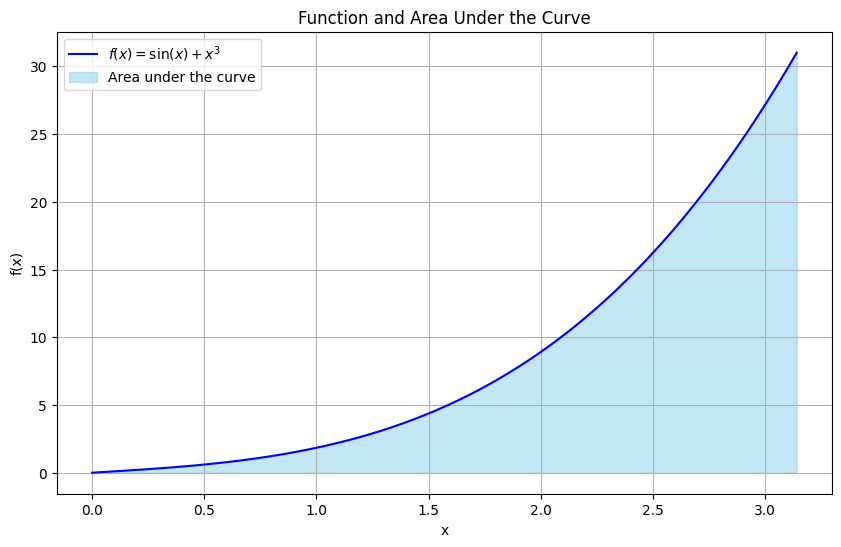

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Convert torch tensors to numpy arrays for plotting
x_np = x.numpy()
y_np = g(x).numpy()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, label=r'$f(x) = \sin(x) + x^3$', color='blue')

# Fill the area under the curve to represent the integral
plt.fill_between(x_np, y_np, color='skyblue', alpha=0.5, label='Area under the curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Area Under the Curve')
plt.legend()
plt.grid(True)
plt.show()